![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [37]:
install.packages("ggplot2")
install.packages("vioplot")

The following package(s) will be installed:
- ggplot2 [3.5.2]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggplot2 ...                        OK [linked from cache]

The following loaded package(s) have been updated:
- ggplot2
Restart your R session to use the new versions.

# Downloading packages -------------------------------------------------------
- Downloading vioplot from CRAN ...             OK [426 Kb in 0.41s]
- Downloading sm from CRAN ...                  OK [784.3 Kb in 0.35s]
Successfully downloaded 2 packages in 1 second.

The following package(s) will be installed:
- sm      [2.2-6.0]
- vioplot [0.5.1]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing sm ...                             OK [installed binary and cached in

In [7]:
# Import necessary libraries
#library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)

In [47]:
null_hypothesis <- "The mean number of goals scored in women's international soccer matches is the same as men's."
Alternate_Hypothesis <- "The mean number of goals scored in women's international soccer matches is greater than men's."

In [12]:
# Start your code here!
# Use as many cells as you like
women_data <- read_csv("women_results.csv", show_col_types = FALSE)
men_data <- read_csv("men_results.csv",show_col_types=FALSE)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [10]:
spec(men_data)

cols(
  ...1 = col_double(),
  date = col_date(format = ""),
  home_team = col_character(),
  away_team = col_character(),
  home_score = col_double(),
  away_score = col_double(),
  tournament = col_character()
)

In [9]:
spec(women_data)

cols(
  ...1 = col_double(),
  date = col_date(format = ""),
  home_team = col_character(),
  away_team = col_character(),
  home_score = col_double(),
  away_score = col_double(),
  tournament = col_character()
)

In [14]:
women_data$date <- as.Date(women_data$date)
men_data$date <- as.Date(men_data$date)
spec(women_data)

cols(
  ...1 = col_double(),
  date = col_date(format = ""),
  home_team = col_character(),
  away_team = col_character(),
  home_score = col_double(),
  away_score = col_double(),
  tournament = col_character()
)

In [16]:
unique (women_data$tournament)

[1] "Euro"                                
 [2] "AFC Championship"                    
 [3] "UEFA Euro qualification"             
 [4] "OFC Championship"                    
 [5] "UEFA Euro"                           
 [6] "African Championship"                
 [7] "CONCACAF Championship"               
 [8] "Copa América"                        
 [9] "FIFA World Cup"                      
[10] "CONCACAF Invitational Tournament"    
[11] "Algarve Cup"                         
[12] "Olympic Games"                       
[13] "Four Nations Tournament"             
[14] "African Championship qualification"  
[15] "CONCACAF Gold Cup qualification"     
[16] "CONCACAF Gold Cup"                   
[17] "AFC Asian Cup qualification"         
[18] "AFC Asian Cup"                       
[19] "Cyprus Cup"                          
[20] "Olympic Games qualification"         
[21] "Friendly"                            
[22] "SheBelieves Cup"                     
[23] "FIFA World Cup qualification"        
[24] "Tournament of Nations"               
[25] "OFC Nations Cup qualification"       
[26] "African Cup of Nations"              
[27] "OFC Nations Cup"                     
[28] "Tournoi de France"                   
[29] "Basque Country Women's Cup"          
[30] "African Cup of Nations qualification"

In [18]:
unique (men_data $ tournament)

[1] "Friendly"                                     
  [2] "British Home Championship"                    
  [3] "Évence Coppée Trophy"                         
  [4] "Copa Lipton"                                  
  [5] "Copa Newton"                                  
  [6] "Copa Premio Honor Argentino"                  
  [7] "Copa Premio Honor Uruguayo"                   
  [8] "Copa Roca"                                    
  [9] "Copa América"                                 
 [10] "Copa Chevallier Boutell"                      
 [11] "Nordic Championship"                          
 [12] "Central European International Cup"           
 [13] "Baltic Cup"                                   
 [14] "Balkan Cup"                                   
 [15] "FIFA World Cup"                               
 [16] "Copa Rio Branco"                              
 [17] "FIFA World Cup qualification"                 
 [18] "Bolivarian Games"                             
 [19] "CCCF Championship"                            
 [20] "NAFC Championship"                            
 [21] "Copa Oswaldo Cruz"                            
 [22] "Pan American Championship"                    
 [23] "Copa del Pacífico"                            
 [24] "Copa Bernardo O'Higgins"                      
 [25] "AFC Asian Cup qualification"                  
 [26] "Atlantic Cup"                                 
 [27] "AFC Asian Cup"                                
 [28] "African Cup of Nations"                       
 [29] "Copa Paz del Chaco"                           
 [30] "Merdeka Tournament"                           
 [31] "UEFA Euro qualification"                      
 [32] "UEFA Euro"                                    
 [33] "Windward Islands Tournament"                  
 [34] "African Cup of Nations qualification"         
 [35] "Vietnam Independence Cup"                     
 [36] "Copa Carlos Dittborn"                         
 [37] "Phillip Seaga Cup"                            
 [38] "CONCACAF Championship"                        
 [39] "Copa Juan Pinto Durán"                        
 [40] "Arab Cup"                                     
 [41] "South Pacific Games"                          
 [42] "CONCACAF Championship qualification"          
 [43] "Copa Artigas"                                 
 [44] "GaNEFo"                                       
 [45] "King's Cup"                                   
 [46] "Gulf Cup"                                     
 [47] "Indonesia Tournament"                         
 [48] "Korea Cup"                                    
 [49] "Palestine Cup"                                
 [50] "Brazil Independence Cup"                      
 [51] "Copa Ramón Castilla"                          
 [52] "Oceania Nations Cup"                          
 [53] "CECAFA Cup"                                   
 [54] "Kuneitra Cup"                                 
 [55] "Copa Félix Bogado"                            
 [56] "Real Madrid 75th Anniversary Cup"             
 [57] "Beijing International Friendship Tournament"  
 [58] "Kirin Cup"                                    
 [59] "CFU Caribbean Cup qualification"              
 [60] "CFU Caribbean Cup"                            
 [61] "Amílcar Cabral Cup"                           
 [62] "FIFA 75th Anniversary Cup"                    
 [63] "Guangzhou International Friendship Tournament"
 [64] "Mundialito"                                   
 [65] "West African Cup"                             
 [66] "Nehru Cup"                                    
 [67] "Merlion Cup"                                  
 [68] "Great Wall Cup"                               
 [69] "UDEAC Cup"                                    
 [70] "Rous Cup"                                     
 [71] "CONMEBOL–UEFA Cup of Champions"               
 [72] "Lunar New Year Cup"                           
 [73] "Arab Cup qualification"                       
 [74] "Tournoi de France"                            
 [75] 

In [22]:
table (women_data $ tournament=='FIFA World Cup')


FALSE  TRUE 
 4600   284 

In [23]:
table (men_data $ tournament=='FIFA World Cup')


FALSE  TRUE 
43389   964 

In [31]:
women_data_wc  <- women_data %>%
  filter(date >= as.Date("2002-01-01")) %>%
  filter(tournament == 'FIFA World Cup') %>%
  mutate(total_goals = home_score + away_score) 
  # summarise(count = n())
  

In [32]:
men_data_wc  <- men_data %>%
  filter(date >= as.Date("2002-01-01")) %>%
  filter(tournament == 'FIFA World Cup') %>%
  mutate(total_goals = home_score + away_score)

In [33]:
mean_goals_women = mean(women_data_wc $ total_goals)
mean_goals_men = mean (men_data_wc $ total_goals)
cat("Mean goals per match for women:", mean_goals_women,"\n")
cat("Mean goals per match for men:", mean_goals_men,"\n")

Mean goals per match for women: 2.98 
Mean goals per match for men: 2.513021 


Loading required package: sm

Package 'sm', version 2.2-6.0: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




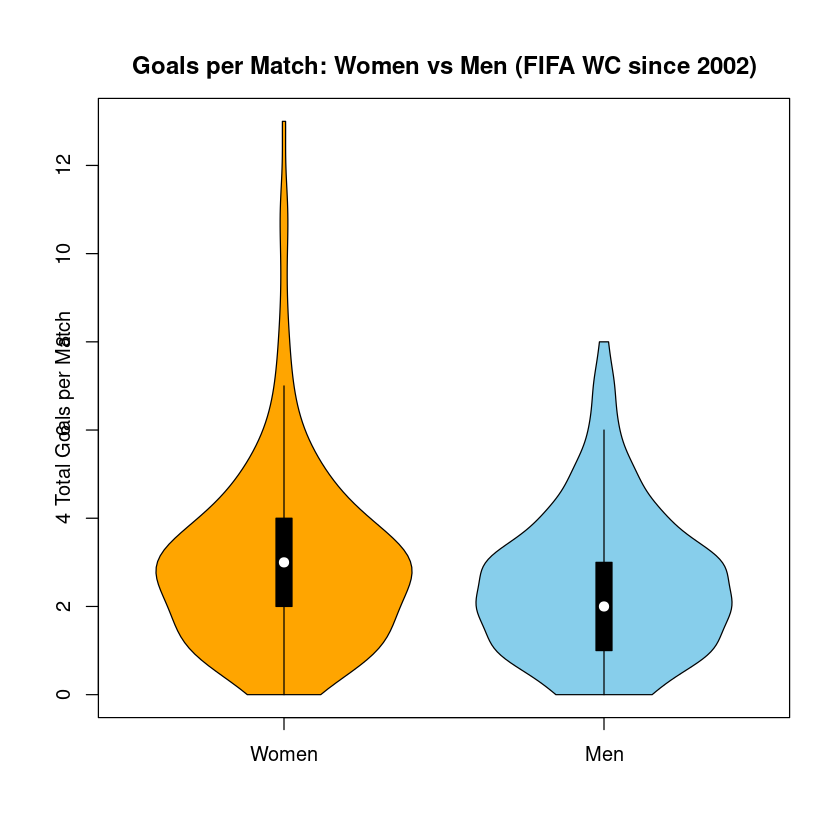

In [38]:
library(vioplot)
vioplot(women_data_wc $ total_goals, men_data_wc $ total_goals,
        names = c("Women", "Men"),
        ylab = "Total Goals per Match",
        main = "Goals per Match: Women vs Men (FIFA WC since 2002)",
        col = c("orange", "skyblue"))


In [42]:
std_error_men = sd(men_data_wc$total_goals) / sqrt(length(men_data_wc$total_goals))
std_error_women = sd(women_data_wc$total_goals) / sqrt(length(women_data_wc$total_goals))
cat ("Standard Error for men's data:",std_error_men,"\n")
cat ("Standard Error for women's data:",std_error_women,"\n")

Standard Error for men's data: 0.08433101 
Standard Error for women's data: 0.1430044 


In [44]:
t_test_result <- t.test (women_data_wc $ total_goals , men_data_wc $ total_goals,
	   alternative = "greater" , var.equal = FALSE)

In [45]:
print(t_test_result)


	Welch Two Sample t-test

data:  women_data_wc$total_goals and men_data_wc$total_goals
t = 2.8128, df = 340.1, p-value = 0.002598
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.193158      Inf
sample estimates:
mean of x mean of y 
 2.980000  2.513021 



In [51]:
if (t_test_result$p.value < 0.1) {
  cat("The null hypothesis:", null_hypothesis, "is rejeced under a level of significance (p =", round(t_test_result$p.value, 4), ")\n")
} else {
  cat("The null hypothesis:", Alternate_Hypothesis, "is accepted under a level of significance (p =", round(t_test_result$p.value, 4), ")\n")
}

The null hypothesis: The mean number of goals scored in women's international soccer matches is the same as men's. is rejeced under a level of significance (p = 0.0026 )
